<a href="https://colab.research.google.com/github/hlcubiot/Hannah-work/blob/main/Week8_DSC503.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Final Project EDA:

---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'1urrJCbWDATXWHqM0IXzbpI-8IEkvF6c3'})
downloaded.GetContentFile('ObesityDataSet.csv')

Data Cleaning/Pre-Processing:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
df = pd.read_csv("ObesityDataSet.csv")                    # cleaning data by dropping any null values
df[df==np.inf]=np.nan
df==df.dropna()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2107,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2108,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2109,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [ ]:
df.isnull().sum()                   # no null values found

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [ ]:
df.info()                                 # all data values are integers and objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [ ]:
df['Gender'].replace(['Male', 'Female'],[0,1],inplace=True)                                 # converting all data values to integers

for column in ['CALC', 'CAEC']:
    df[column].replace(['no', 'Sometimes', 'Frequently', 'Always'],[0,1,2,3],inplace=True)

for column in ['FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight']:
    df[column].replace(['no', 'yes'],[0,1],inplace=True)

df['MTRANS'].replace(['Walking','Public_Transportation', 'Bike', 'Motorbike', 'Automobile'],[0,1,2,3,4],inplace=True)
df['NObeyesdad'].replace(['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'],[0,1,2,3,4,5,6],inplace=True)

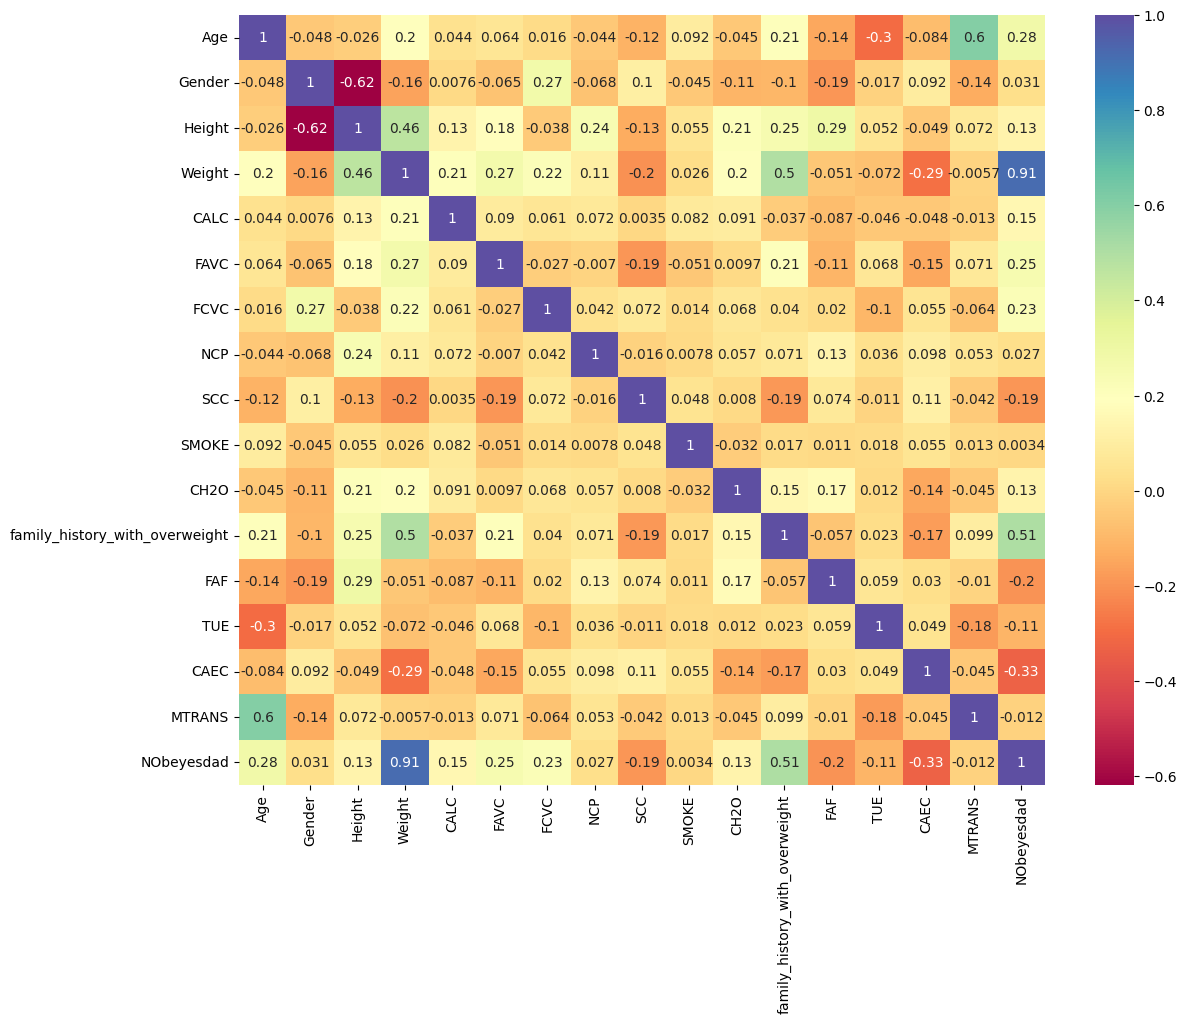

In [ ]:
plt.figure(figsize=(13, 10))                                      # Correlation heat matrix
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Spectral)
plt.show()

In [ ]:
X = df.drop('NObeyesdad', axis='columns')                                       # splitting data into training and test set
y = df['NObeyesdad']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=1)

Gradient Boosting:

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1, n_estimators=200, learning_rate=.1)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=1, n_estimators=200, random_state=0)

In [ ]:
pred_Y = gbrt.predict(X_test)
acc_gbrt = accuracy_score(y_test, pred_Y)
print("Gradient Boosting Classifier accuracy is : {:.2f}".format(acc_gbrt))

Gradient Boosting Classifier accuracy is : 0.83


Random Forest:

In [ ]:
forest = RandomForestClassifier(n_estimators=20, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [ ]:
Y_pred = forest.predict(X_test)
accuracy_forest = accuracy_score(y_test, Y_pred)
print("Random Forest Classifier accuracy is:", accuracy_forest)

Random Forest Classifier accuracy is: 0.8916518650088809


K-Nearest Neighbor:

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn_accuracy = cross_val_score(knn, X, y, scoring= 'accuracy', cv =10).mean()
print("K-Nearest Neighbor accuracy is:", knn_accuracy)

K-Nearest Neighbor accuracy is: 0.8820821783063579


In [ ]:
%%shell
jupyter nbconvert --to html /content/Week8_DSC503.ipynb

[NbConvertApp] Converting notebook /content/Week8_DSC503.ipynb to html
[NbConvertApp] Writing 930085 bytes to /content/Week8_DSC503.html
